# Getting the signal

In [1]:
from scipy.io import loadmat
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

mat_data =  loadmat("C:\\Users\\pragu\\OneDrive\\Desktop\\EEG_128channels[1]\\EEG_128channels\\02010005rest 20150507 0907..mat")
filtered_data = []
# print(mat_data)
for i in range(len(mat_data['a02010005rest_20150507_0907mat'])):
    data = mat_data['a02010005rest_20150507_0907mat'][i]
    # data2 = mat_data['Impedances_0']
    print(f'original data = {data}')
    
    sampling_rate = 128 # Example sampling rate in Hz
    lowcut = 0.5
    highcut = 50
    nyquist  = 0.5 * sampling_rate
    eeg_signal = data
    low = lowcut/nyquist
    high = highcut/nyquist

    b, a = signal.butter(4,[low,high], btype= 'bandpass')
    filtered_signal = signal.lfilter(b,a , eeg_signal)
    filtered_data.append(filtered_signal)

    # filtered_signal_2 = signal.filtfilt(b,a , eeg_signal)
    print(f'filtered data = {filtered_signal}')
    print(len(filtered_signal))
    

    # Create a time axis (assuming the signal is sampled regularly)
    sampling_rate = 128 # Example sampling rate in Hz
    time = np.arange(len(data)) / sampling_rate

    # Plot the signal
    # plt.figure(figsize=(10, 6))
    # plt.plot(time, filtered_signal, label = 'filtered eeg signal ')
    # plt.plot(time, data, label = 'original eeg signal' )
    # plt.xlabel('Time (s)')
    # plt.ylabel('Amplitude')
    # plt.title('Signal Plot')
    # plt.legend()
    # plt.grid(True)
    # plt.show()

original data = [-12293.32910156 -12122.15917969 -11642.0078125  ... -11465.36621094
 -10980.34179688 -10784.53613281]
filtered data = [ -4734.8308696  -12820.65004916 -11537.43482781 ...   -432.00350777
    -49.17641316    400.14856013]
75226
original data = [-4707.40185547 -4540.24462891 -4056.87451172 ... -4305.96728516
 -3825.3737793  -3626.40869141]
filtered data = [-1813.07694903 -4870.188895   -4196.07926062 ...  -430.71945309
   -54.46844398   396.34131745]
75226
original data = [-4631.10986328 -4435.09765625 -3916.55761719 ... -4093.01049805
 -3548.80664062 -3370.92626953]
filtered data = [-1783.69274588 -4779.10160138 -4078.42379199 ...  -469.28597817
   -22.52250537   457.33232266]
75226
original data = [-2295.05615234 -2109.45483398 -1603.90783691 ... -2184.44506836
 -1649.02502441 -1476.11706543]
filtered data = [ -883.95117611 -2334.32510734 -1832.68894297 ...  -455.39766346
   -20.36075874   446.94254992]
75226
original data = [-1910.05847168 -1768.37023926 -1324.2938232

In [3]:
filtered_data_array = np.array(filtered_data)
print(filtered_data_array)

[[ -4734.8308696  -12820.65004916 -11537.43482781 ...   -432.00350777
     -49.17641316    400.14856013]
 [ -1813.07694903  -4870.188895    -4196.07926062 ...   -430.71945309
     -54.46844398    396.34131745]
 [ -1783.69274588  -4779.10160138  -4078.42379199 ...   -469.28597817
     -22.52250537    457.33232266]
 ...
 [ -4033.34945289 -10900.64097187  -9748.90649468 ...   -446.66203121
     -26.46305433    433.77408955]
 [ -2117.19346545  -5679.69383158  -4905.49896868 ...   -467.16611844
     -26.30130167    453.19629404]
 [     0.              0.              0.         ...      0.
       0.              0.        ]]


# DOING ICA

c:\Users\pragu\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\decomposition\_fastica.py:542: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


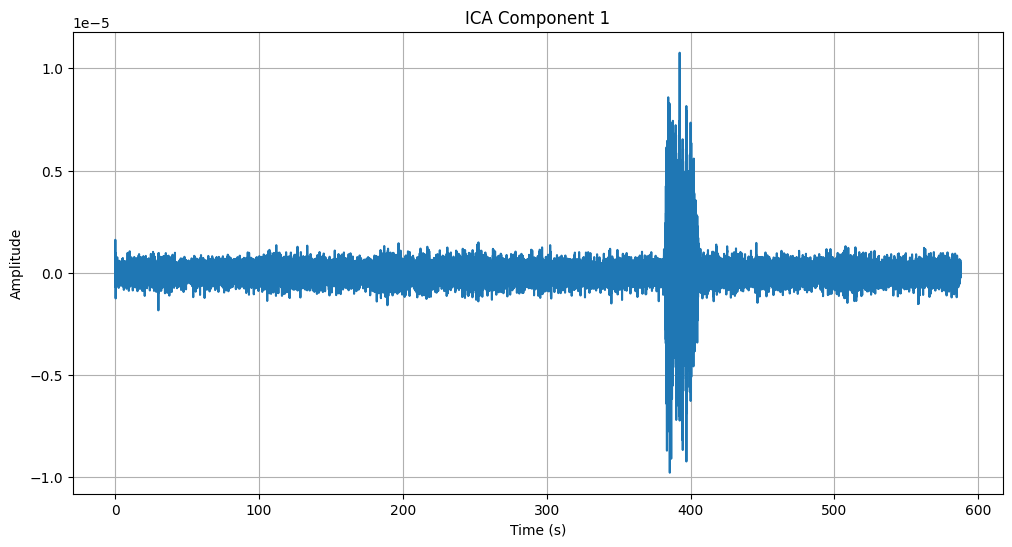

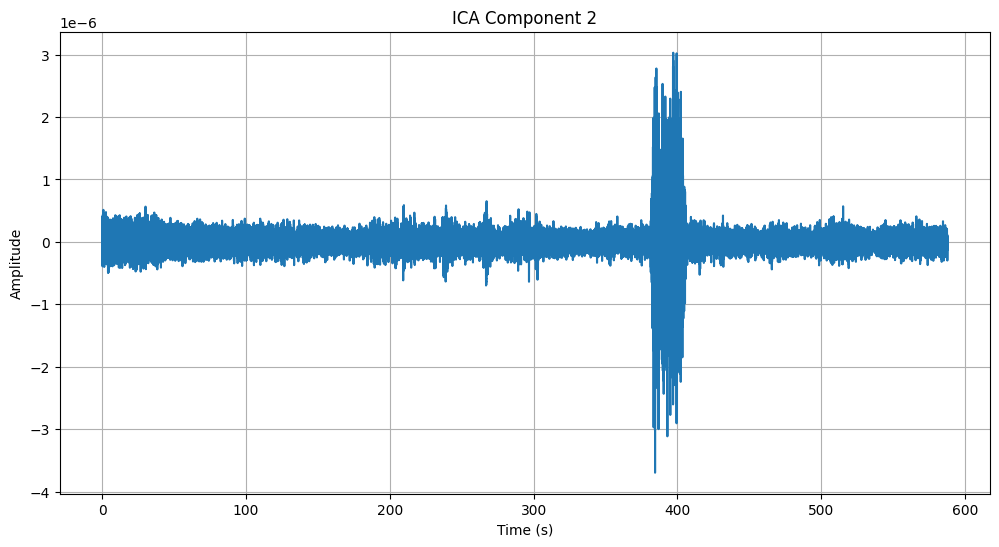

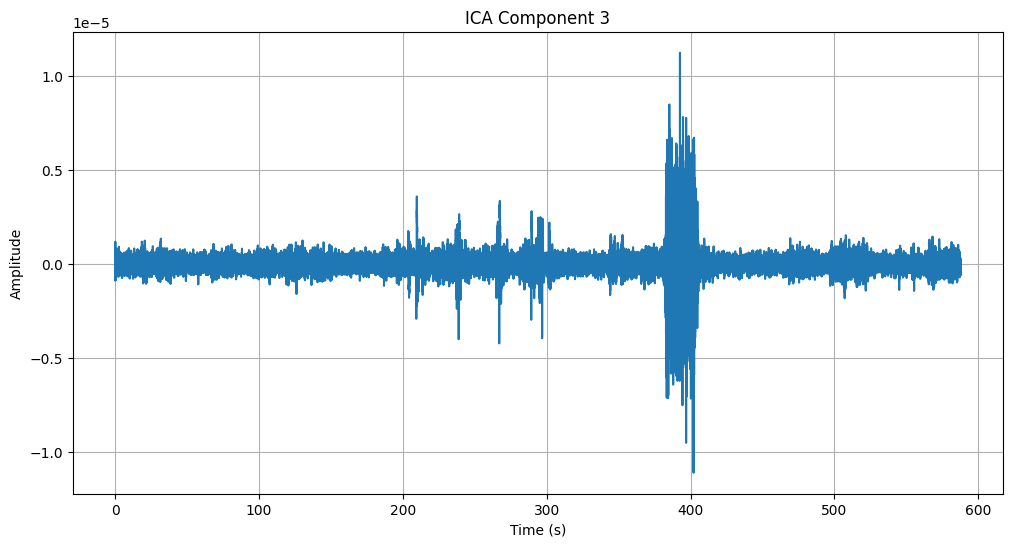

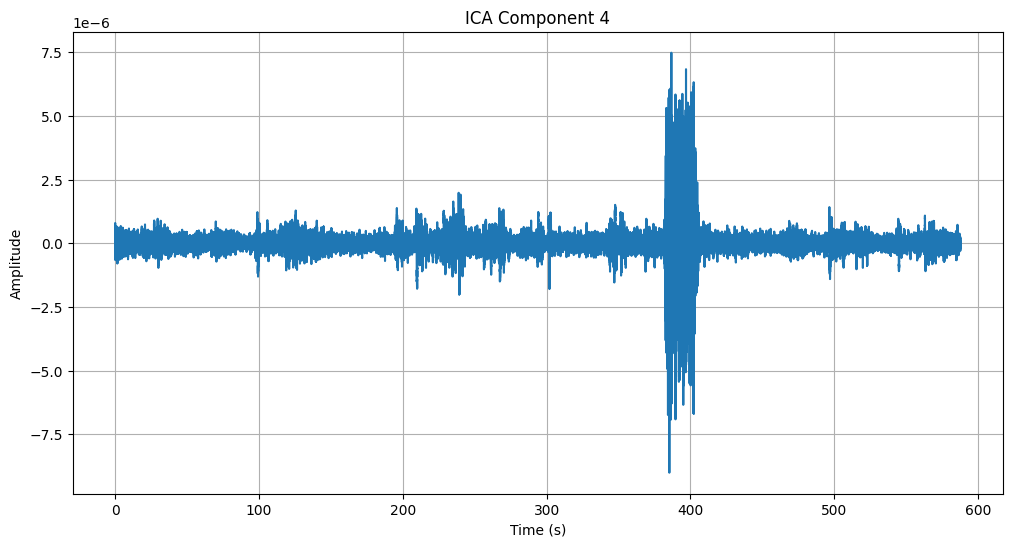

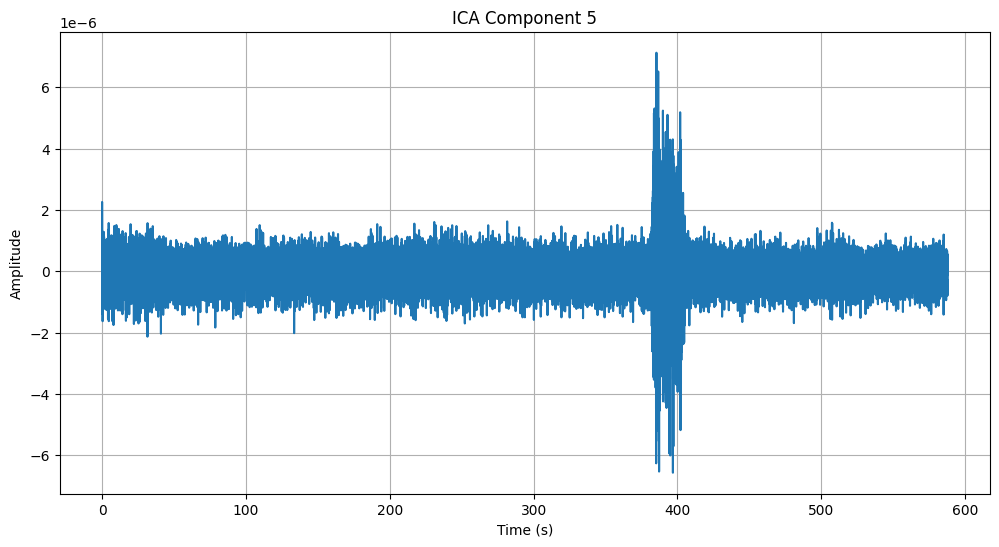

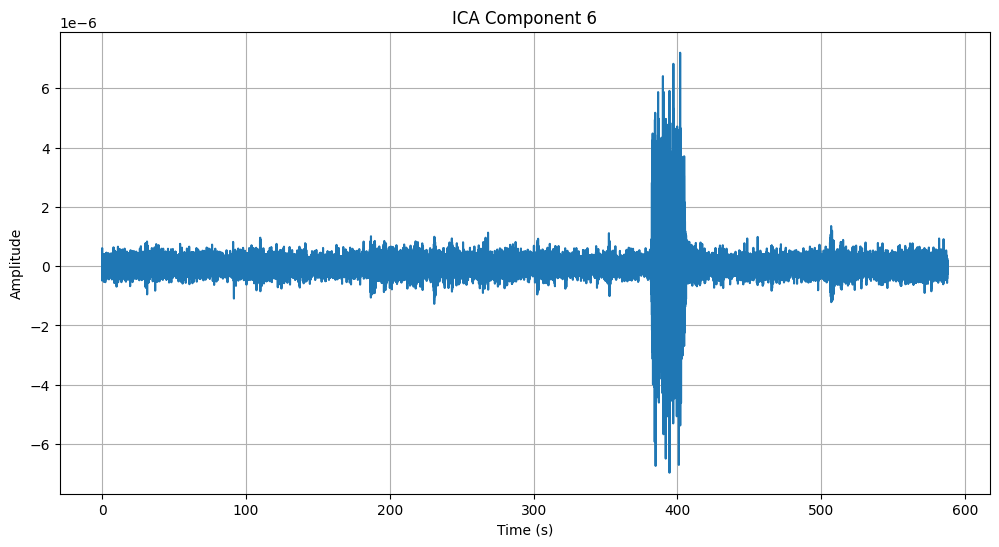

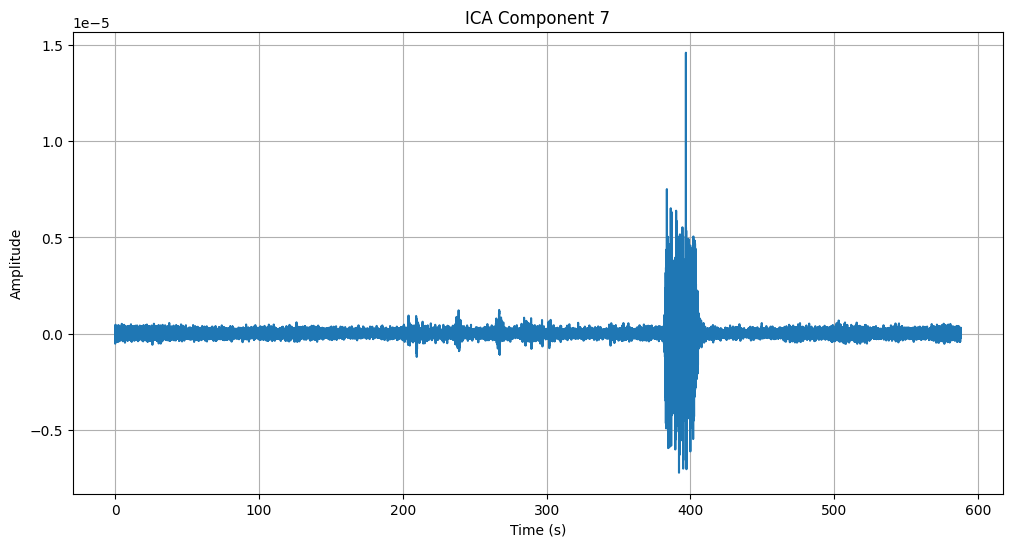

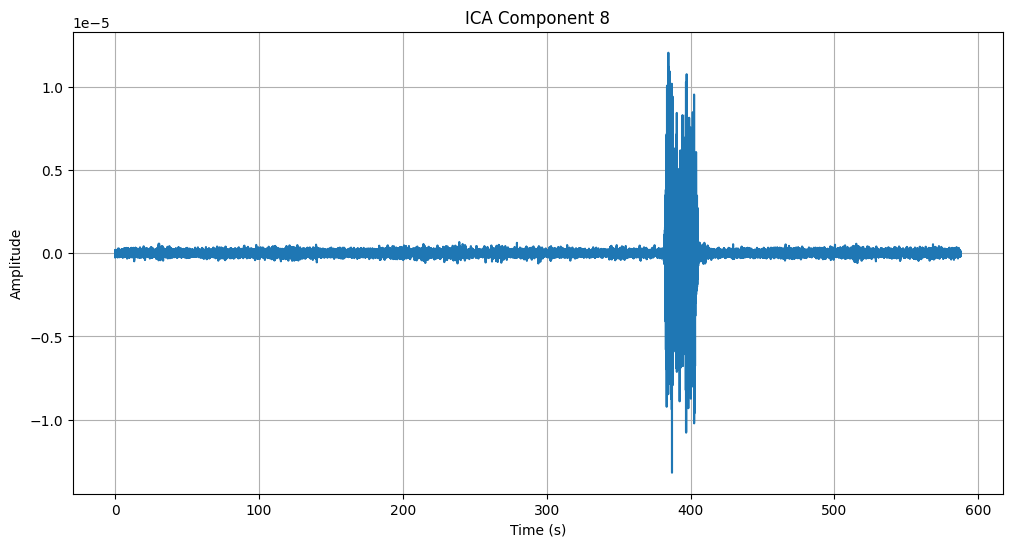

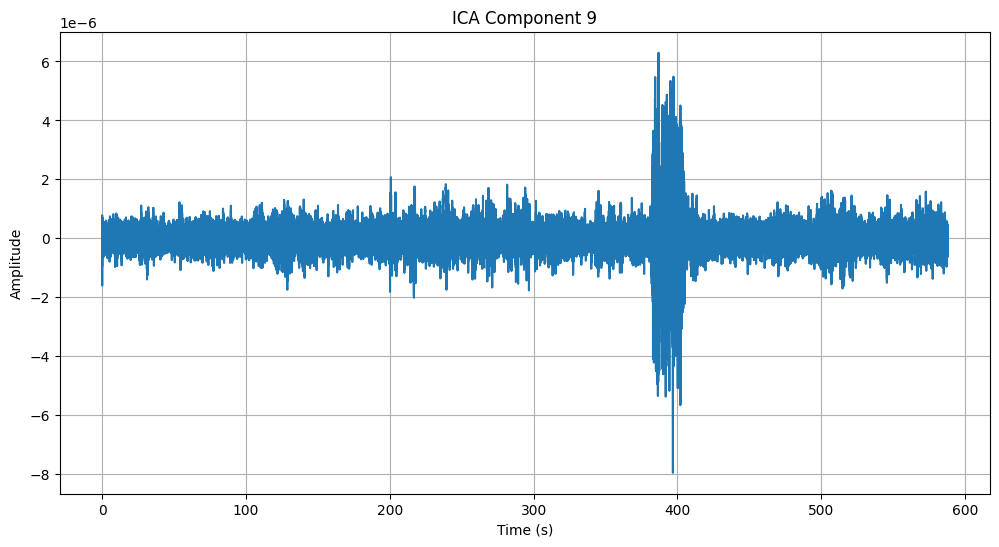

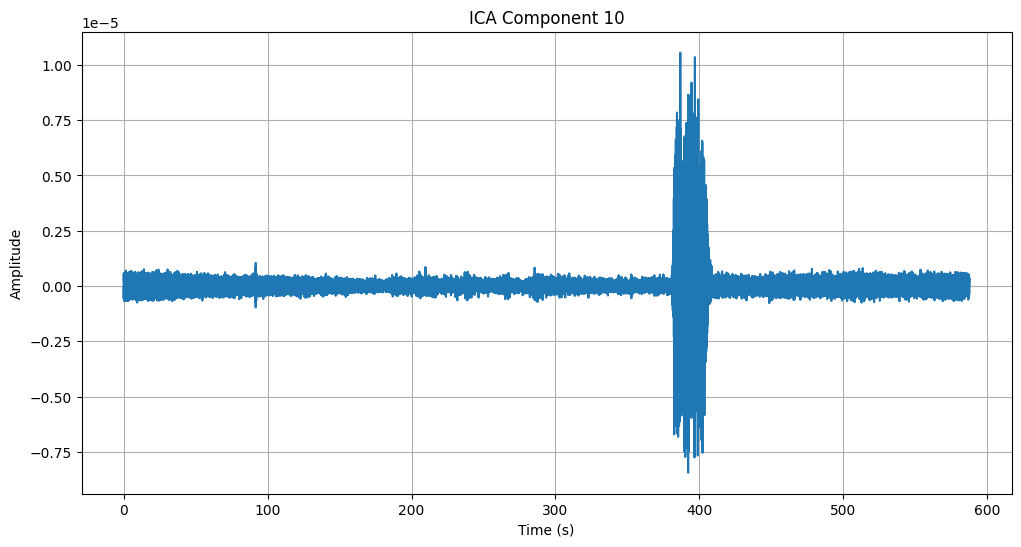

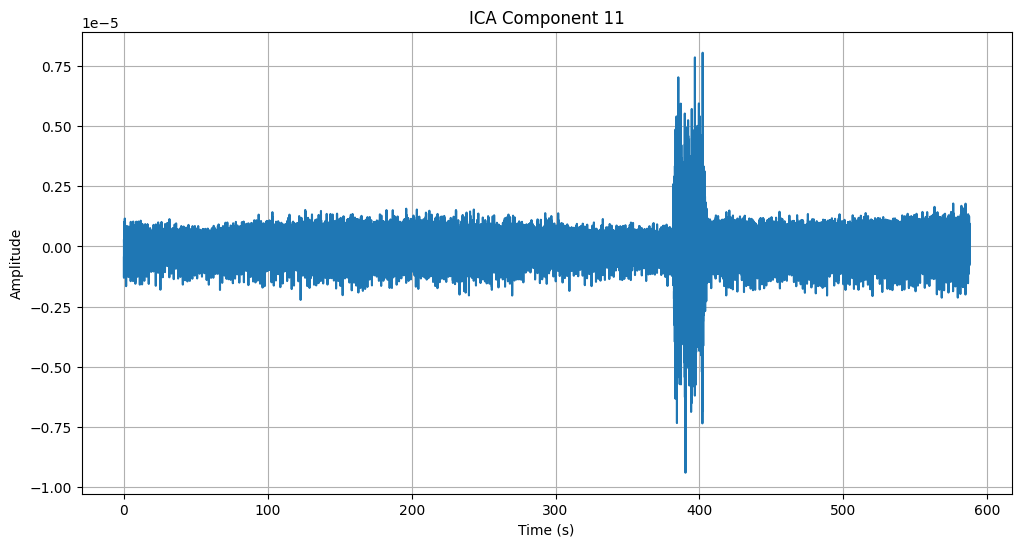

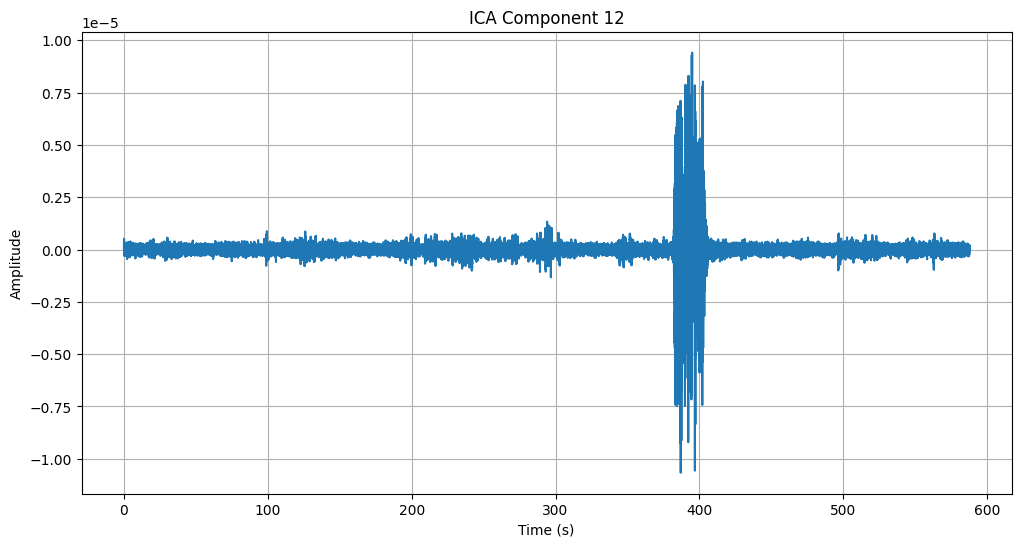

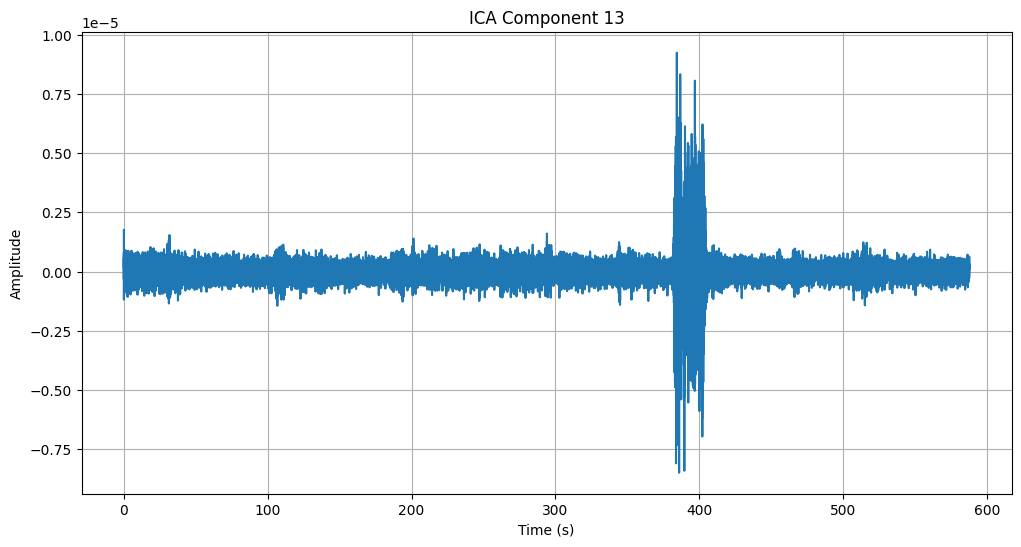

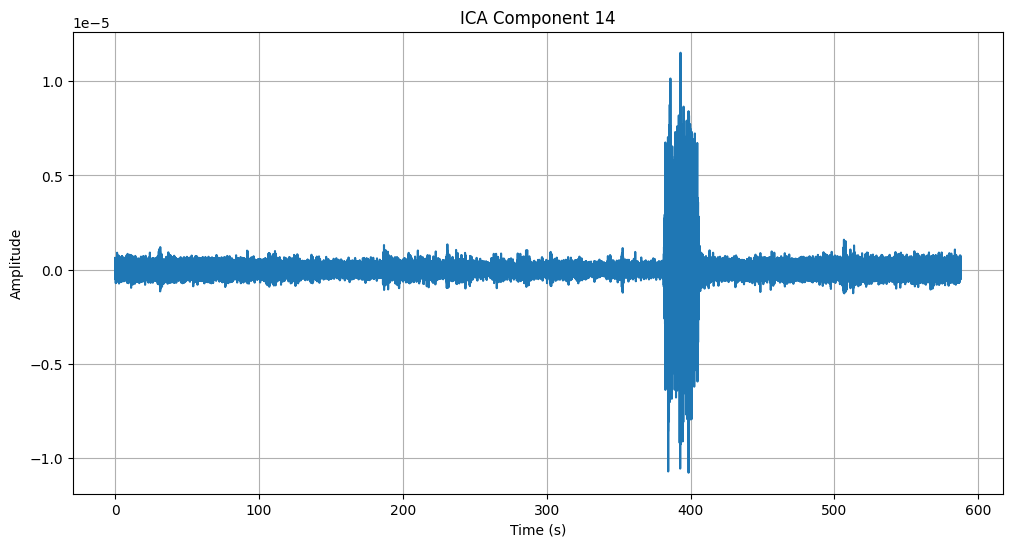

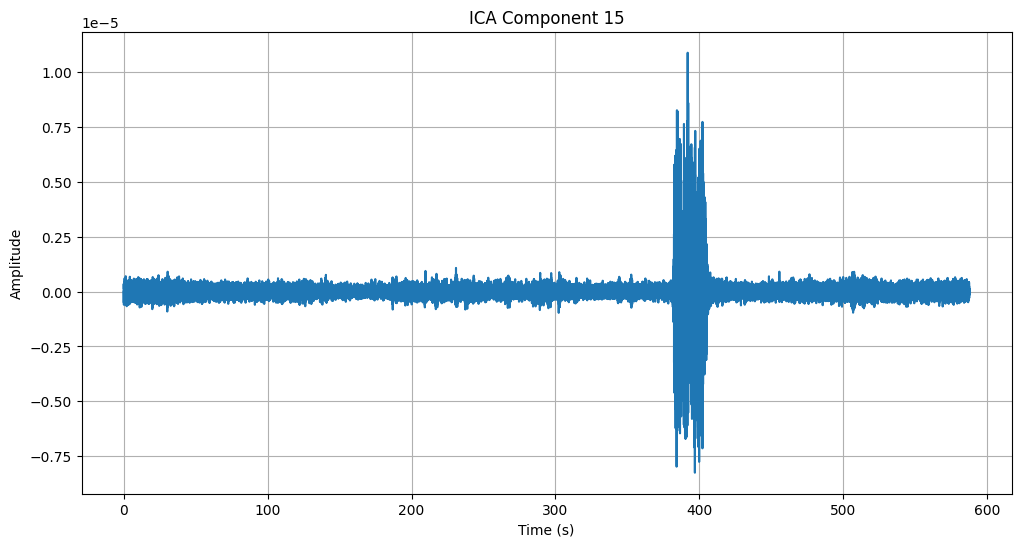

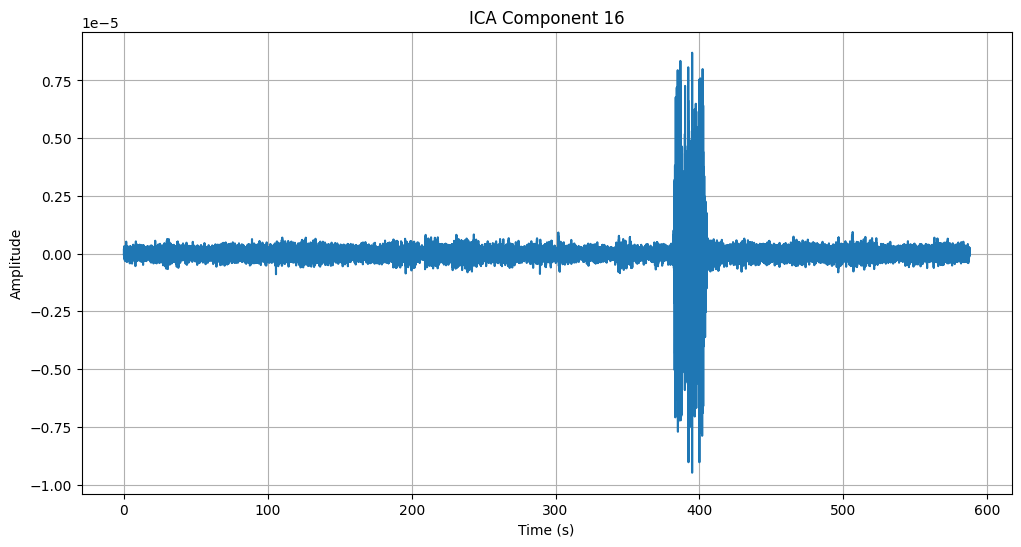

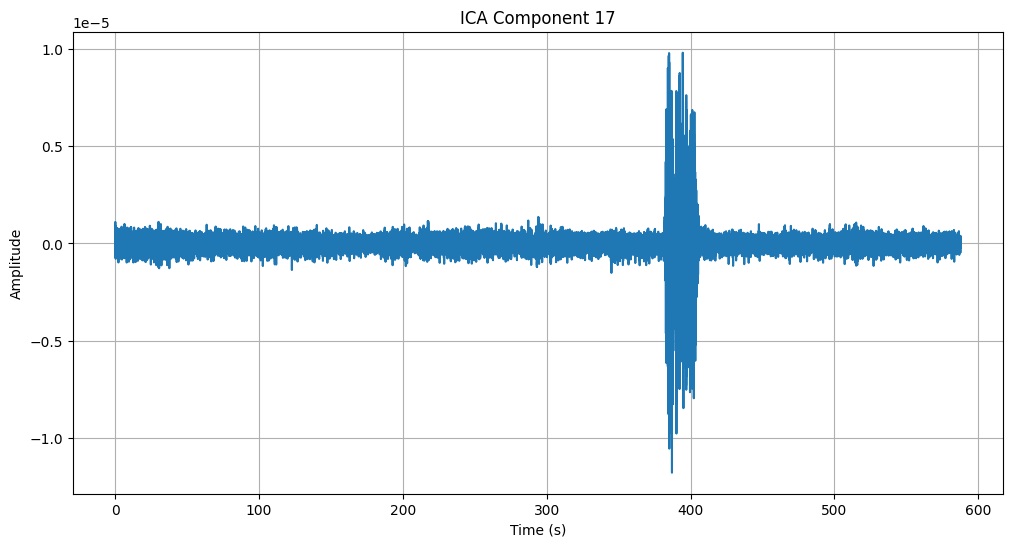

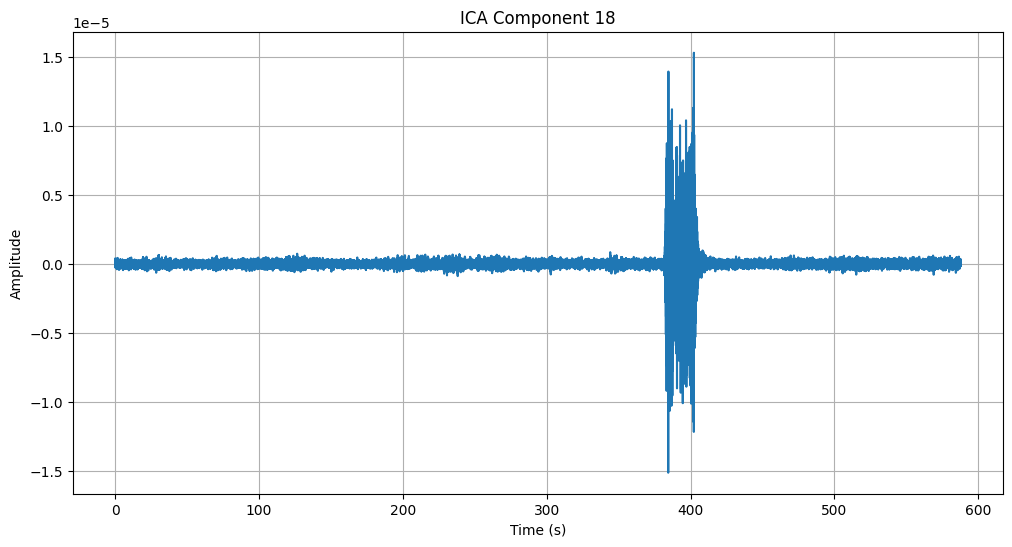

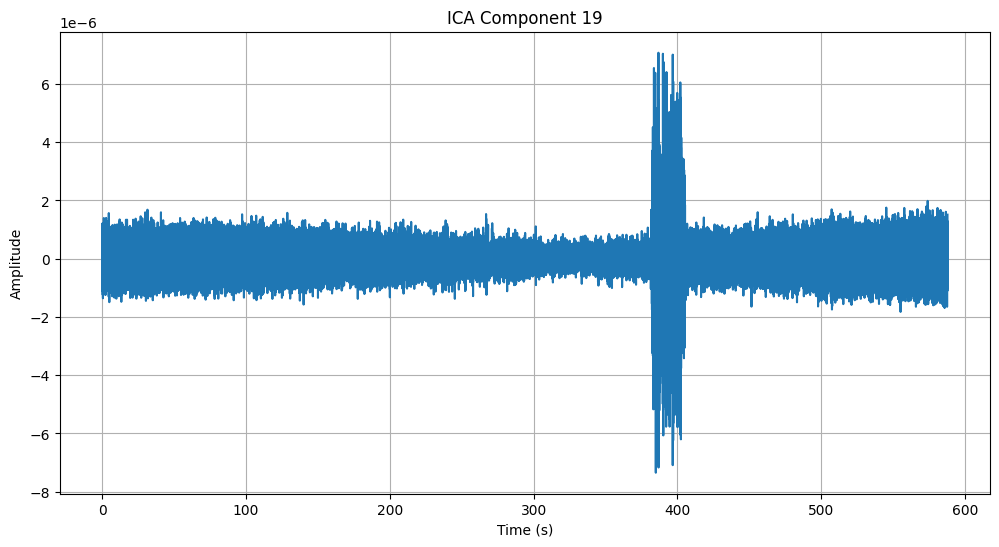

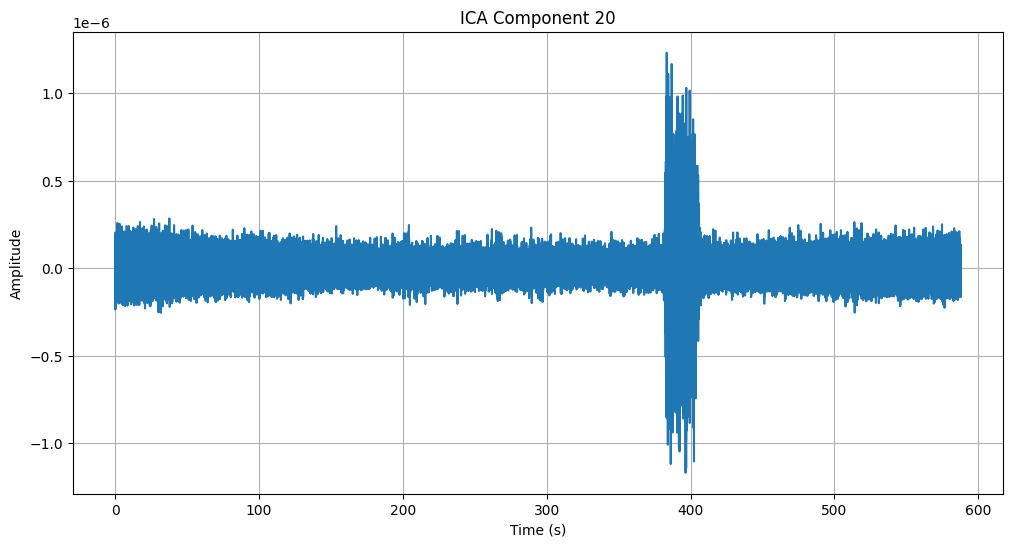

[[-4.24681947e+03 -1.15504079e+04 -1.06256983e+04 ... -4.76883780e+01
  -2.70333899e+01  2.33869479e+01]
 [-1.31681427e+03 -3.58251645e+03 -3.28477344e+03 ... -4.44503023e+01
  -2.64331785e+01  2.18058308e+01]
 [-1.29036587e+03 -3.49801915e+03 -3.16836570e+03 ... -8.13753317e+01
   7.48757787e+00  8.22443159e+01]
 ...
 [-3.53965158e+03 -9.62146221e+03 -8.84369948e+03 ... -5.81051083e+01
  -1.14932944e+00  5.40104837e+01]
 [-1.62361831e+03 -4.39914273e+03 -3.99560052e+03 ... -7.87194122e+01
   2.83372169e+00  7.83430319e+01]
 [ 4.95027858e+02  1.28302539e+03  9.06281820e+02 ...  3.90133544e+02
   2.81570099e+01 -3.75359652e+02]]
[[-4.27748357e+03 -1.16321597e+04 -1.06928264e+04 ... -5.89820665e+01
  -2.57171646e+01  3.50532944e+01]
 [-1.26944802e+03 -3.45155899e+03 -3.15477471e+03 ... -5.77415514e+01
  -2.53426874e+01  3.35468519e+01]
 [-1.51439837e+03 -4.10915396e+03 -3.73996756e+03 ... -6.97798146e+01
   6.32030804e+00  7.41645799e+01]
 ...
 [-2.71657200e+03 -7.38962006e+03 -6.8052747

In [7]:
from sklearn.decomposition import FastICA

ica2 = FastICA(n_components=20, random_state= 0)

independant_components = ica2.fit_transform(filtered_data_array)

# Specify the index of the component you want to plot (e.g., component 0)

# Extract the component (each component is a row in 'ica.mixing_')

components_to_remove = [3,6,7,11]
# Create a time axis (assuming your data is sampled at a constant rate)


n_samples = len(ica2.components_[0, :])
sampling_rate = 128 # Replace with your actual sampling rate in Hz
time = np.arange(n_samples) / sampling_rate

# Loop through each component and plot it separately
for component_idx in range(20):
    component = ica2.components_[component_idx, :]

    plt.figure(figsize=(12, 6))
    plt.plot(time, component)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(f'ICA Component {component_idx + 1}')
    plt.grid(True)
    plt.show()
    
original_signal = np.dot(independant_components, ica2.mixing_.T)
print(original_signal)
ica_components_filtered = np.delete(independant_components, components_to_remove, axis= 1)
ica2.mixing_ = np.delete(ica2.mixing_.T, components_to_remove, axis=0)

reconstructed_signal = np.dot(ica_components_filtered, ica2.mixing_)
print(reconstructed_signal)

In [8]:
print(reconstructed_signal)

[[-4.27748357e+03 -1.16321597e+04 -1.06928264e+04 ... -5.89820665e+01
  -2.57171646e+01  3.50532944e+01]
 [-1.26944802e+03 -3.45155899e+03 -3.15477471e+03 ... -5.77415514e+01
  -2.53426874e+01  3.35468519e+01]
 [-1.51439837e+03 -4.10915396e+03 -3.73996756e+03 ... -6.97798146e+01
   6.32030804e+00  7.41645799e+01]
 ...
 [-2.71657200e+03 -7.38962006e+03 -6.80527479e+03 ... -3.43682748e+01
   5.34284822e-01  3.23709346e+01]
 [-4.45799003e+02 -1.20853830e+03 -1.09928459e+03 ... -2.05663096e+01
   1.75139365e+00  2.16481775e+01]
 [ 3.95176333e+02  1.01300695e+03  6.64397060e+02 ...  3.80403596e+02
   2.90218675e+01 -3.64919481e+02]]


# Calculating band frequencies

In [9]:
from scipy.signal import welch
import numpy as np
import matplotlib.pyplot as plt


frequency_bands = {
    'Delta' : (0.5, 4),
    'Theta' : (4, 8),
    'Alpha' : (8, 13),
    'Beta'  : (13, 30),
    'Gamma' : (30, 50)
}

# Create a dictionary to store PSD values and frequencies for each electrode and band
electrode_band_data = {electrode: {band: {'frequencies': [], 'psd': []} for band in frequency_bands} for electrode in range(reconstructed_signal.shape[0])}

# Loop through each channel (electrode)
for electrode in range(reconstructed_signal.shape[0]):
    electrode_data = reconstructed_signal[electrode]

    # Calculate PSD for the current channel
    frequencies, psd = welch(electrode_data, fs=sampling_rate, nperseg=2048)

    # Loop through frequency bands and store PSD values and frequencies
    for band, (low, high) in frequency_bands.items():
        band_indices = np.where((frequencies >= low) & (frequencies < high))
        band_psd = psd[band_indices]
        band_frequencies = frequencies[band_indices]
        electrode_band_data[electrode][band]['frequencies'] = band_frequencies
        electrode_band_data[electrode][band]['psd'] = band_psd

    # Plot the PSD for the current channel
    # plt.figure(figsize=(12, 6))
    # plt.semilogy(frequencies[(frequencies >= 0.1) & (frequencies <= 30)], psd[(frequencies >= 0.1) & (frequencies <= 30)])
    # plt.xlabel('Frequency (Hz)')
    # plt.ylabel('Power/Frequency (dB/Hz)')
    # plt.title('Power Spectral Density (PSD) - Channel {}'.format(electrode))
    # plt.grid(True)
    # plt.show()
    
for i in range(129):
    print(f"Alpha Band Frequencies for Electrode {i}:", electrode_band_data[i]['Theta']['frequencies'])
    print(f'Alpha Band psd for Electrode {i}:', electrode_band_data[i]['Theta']['psd'])

    

Alpha Band Frequencies for Electrode 0: [4.     4.0625 4.125  4.1875 4.25   4.3125 4.375  4.4375 4.5    4.5625
 4.625  4.6875 4.75   4.8125 4.875  4.9375 5.     5.0625 5.125  5.1875
 5.25   5.3125 5.375  5.4375 5.5    5.5625 5.625  5.6875 5.75   5.8125
 5.875  5.9375 6.     6.0625 6.125  6.1875 6.25   6.3125 6.375  6.4375
 6.5    6.5625 6.625  6.6875 6.75   6.8125 6.875  6.9375 7.     7.0625
 7.125  7.1875 7.25   7.3125 7.375  7.4375 7.5    7.5625 7.625  7.6875
 7.75   7.8125 7.875  7.9375]
Alpha Band psd for Electrode 0: [5.16933803 5.18321829 5.16439906 5.45892231 4.80895538 2.94698224
 2.46307545 3.50513945 5.72620846 3.86606083 1.84202878 1.79048483
 2.07924219 2.61306578 3.85528371 6.56988866 6.92932995 2.12811616
 2.78610851 4.42786931 3.52443364 3.25569913 5.07908869 5.77161934
 3.08981167 1.74816127 1.96040572 3.02720909 6.84332137 6.13837947
 4.35115042 4.31600701 5.16564807 5.08880946 3.49146572 3.59534889
 4.63499428 3.2772959  3.32509539 3.0436035  2.52080359 2.5628152
 1.6

In [10]:
alpha_frequency_mean = []
alpha_frequency_variance = []
alpha_psd_mean = []
alpha_psd_variance = []

Beta_frequency_mean = []
Beta_frequency_variance = []
Beta_psd_mean = []
Beta_psd_variance = []

gamma_frequency_mean = []
gamma_frequency_variance = []
gamma_psd_mean = []
gamma_psd_variance = []

theta_frequency_mean = []
theta_frequency_variance = []
theta_psd_mean = []
theta_psd_variance = []

Delta_frequency_mean = []
Delta_frequency_variance = []
Delta_psd_mean = []
Delta_psd_variance = []


for i in range(reconstructed_signal.shape[0]):

    
    mean_alpha_frequency_value = np.mean(electrode_band_data[i]['Alpha']['frequencies'])
    alpha_frequency_mean.append(mean_alpha_frequency_value)
    # print(Mean_alpha_frequency_value)
    
    variance_alpha_frequency_value = np.var(electrode_band_data[i]['Alpha']['frequencies'])
    alpha_frequency_variance.append(variance_alpha_frequency_value)
    
    mean_alpha_psd_value = np.mean(electrode_band_data[i]['Alpha']['psd'])
    alpha_psd_mean.append(mean_alpha_psd_value)
    
    variance_alpha_psd_value = np.var(electrode_band_data[i]['Alpha']['psd'])
    alpha_psd_variance.append(variance_alpha_psd_value)
    
    
    mean_beta_frequency_value = np.mean(electrode_band_data[i]['Beta']['frequencies'])
    Beta_frequency_mean.append(mean_beta_frequency_value)
    # print(Mean_alpha_frequency_value)
    
    variance_beta_frequency_value = np.var(electrode_band_data[i]['Beta']['frequencies'])
    Beta_frequency_variance.append(variance_beta_frequency_value)
    
    mean_beta_psd_value = np.mean(electrode_band_data[i]['Beta']['psd'])
    Beta_psd_mean.append(mean_beta_psd_value)
    
    variance_beta_psd_value = np.var(electrode_band_data[i]['Beta']['psd'])
    Beta_psd_variance.append(variance_beta_psd_value)    
    
    
    mean_gamma_frequency_value = np.mean(electrode_band_data[i]['Gamma']['frequencies'])
    gamma_frequency_mean.append(mean_gamma_frequency_value)
    # print(Mean_alpha_frequency_value)
    
    variance_gamma_frequency_value = np.var(electrode_band_data[i]['Gamma']['frequencies'])
    gamma_frequency_variance.append(variance_gamma_frequency_value)
    
    mean_gamma_psd_value = np.mean(electrode_band_data[i]['Gamma']['psd'])
    gamma_psd_mean.append(mean_gamma_psd_value)
    
    variance_gamma_psd_value = np.var(electrode_band_data[i]['Gamma']['psd'])
    gamma_psd_variance.append(variance_gamma_psd_value)
    
    
    mean_theta_frequency_value = np.mean(electrode_band_data[i]['Theta']['frequencies'])
    theta_frequency_mean.append(mean_theta_frequency_value)
    # print(Mean_alpha_frequency_value)
    
    variance_theta_frequency_value = np.var(electrode_band_data[i]['Theta']['frequencies'])
    theta_frequency_variance.append(variance_theta_frequency_value)
    
    mean_theta_psd_value = np.mean(electrode_band_data[i]['Theta']['psd'])
    theta_psd_mean.append(mean_theta_psd_value)
    
    variance_theta_psd_value = np.var(electrode_band_data[i]['Theta']['psd'])
    theta_psd_variance.append(variance_theta_psd_value)
    
    
    
    mean_delta_frequency_value = np.mean(electrode_band_data[i]['Delta']['frequencies'])
    Delta_frequency_mean.append(mean_delta_frequency_value)
    # print(Mean_alpha_frequency_value)
    
    variance_delta_frequency_value = np.var(electrode_band_data[i]['Delta']['frequencies'])
    Delta_frequency_variance.append(variance_delta_frequency_value)
    
    mean_delta_psd_value = np.mean(electrode_band_data[i]['Delta']['psd'])
    Delta_psd_mean.append(mean_delta_psd_value)
    
    variance_delta_psd_value = np.var(electrode_band_data[i]['Delta']['psd'])
    Delta_psd_variance.append(variance_delta_psd_value)
    
    
print(alpha_psd_mean)
print(alpha_psd_variance)

print(Beta_psd_mean)
print(Beta_psd_variance)

print(gamma_psd_mean)
print(gamma_psd_variance)

print(theta_psd_mean)
print(theta_psd_variance)

print(Delta_psd_mean)
print(Delta_psd_variance)


[3.2748120779308736, 6.298111296295582, 0.6338222119434531, 0.1234520195483186, 0.09519376928996129, 0.17437885306143794, 0.39863982546068666, 5.134187652588988, 1.0800950193558987, 0.4029515533652355, 0.17677143111394703, 0.31253942378427146, 0.6233765490698514, 2.20703467239003, 0.4094879661627557, 0.19780973829458903, 1.1084209946590131, 0.27452241950899053, 0.4432045734168336, 0.9756670824844269, 0.397937968637233, 0.24919717340674294, 1.2600617376414236, 1.392466916422097, 0.6493801149872311, 2.2325885142871638, 3.8535453805093027, 4.085504092317484, 1.415770738093276, 0.9831072340145367, 0.6366283893886985, 0.758681491988563, 2.0911461890350487, 7.841360054935206, 4.0851424095055116, 2.3372960899828747, 0.8333260985947117, 0.8054174358120637, 2.8761095260191554, 1.7558190609419675, 1.8239524639239426, 3.710295035238237, 1.8676301594798521, 1.7608932351887359, 1.4430272030089033, 0.12677317225080903, 2.227187438026674, 6.4969975296259665, 2.8403399135158613, 0.4299387567334961, 0.

# Calculating Fractal Dimension

In [11]:
def higuchi_fd(signal, k_max):
    N = len(signal)
    Lmk = np.zeros((k_max,))

    for k in range(1, k_max + 1):
        Lm = 0.0
        for m in range(1, k + 1):
            Lmk_temp = 0.0
            for i in range(1, int((N - m) / k) + 1):
                Lmk_temp += abs(signal[m + i * k - 1] - signal[m + (i - 1) * k - 1])
            Lmk_temp *= (N - 1) / (((N - m) / k) * k)
            Lm += Lmk_temp

        Lm /= k
        Lmk[k - 1] = Lm

    HFD = np.log(Lmk[1:] / Lmk[:-1]) / np.log(1.0 / np.arange(2, k_max + 1))
    return HFD.mean()

k_max = 20 # Adjust as needed

fractal_dimensions = []

for electrode_data in reconstructed_signal:
    hfd_value = higuchi_fd(electrode_data, k_max)
    fractal_dimensions.append(hfd_value)

# Now, fractal_dimensions contains the Higuchi Fractal Dimension for each electrode
print("Higuchi Fractal Dimensions for Each Electrode:")
print(fractal_dimensions)

Higuchi Fractal Dimensions for Each Electrode:
[0.13007347254088356, 0.12781412367854036, 0.15367956459682577, 0.1621785765418701, 0.14768022239655967, 0.1630235372675303, 0.1751986552057571, 0.12305498396826076, 0.15046979486296228, 0.15384676277192158, 0.16048847739759556, 0.16068101996256934, 0.166118824789111, 0.13874395526100322, 0.15209463635647702, 0.1638455850834285, 0.13184701553344427, 0.16260288421079702, 0.15698554553578448, 0.14166792794267258, 0.14806246041793045, 0.15827846955656585, 0.14786713009607172, 0.14604010262968817, 0.12321674915001206, 0.12111866969890682, 0.13361361279911624, 0.127826159859444, 0.166883005169769, 0.1783791688472937, 0.1797187667208658, 0.13492734252559754, 0.14494218648470722, 0.143267665028391, 0.15357892640172005, 0.16133698257948142, 0.17244647842746852, 0.11378834257058268, 0.14499209373966238, 0.14842499681075313, 0.1354286682891141, 0.11658250549095354, 0.1374032487110827, 0.14905261135846323, 0.1471994751935699, 0.13365327206186742, 0.1

# Calculating Wavelet Energy

In [12]:
import numpy as np
import pywt

# Generate or load your EEG data
# Replace this with your actual EEG data
# Example: Simulated EEG data as a placeholder
eeg_data = reconstructed_signal  # 1000 time points, 128 electrodes

# Define the wavelet and level of decomposition
wavelet_name = 'db4'  # You can choose a different wavelet as needed
level = 5

# Initialize an empty list to store wavelet energy for each electrode
wavelet_energy_per_electrode = []

# Calculate wavelet energy for each electrode
for electrode_data in eeg_data:  # Iterate over columns (electrodes)
    # Perform discrete wavelet decomposition
    coeffs = pywt.wavedec(electrode_data, wavelet_name, level=level)
    
    # Calculate the energy for each detail coefficient (excluding the approximation coefficient)
    energy_per_detail = [np.sum(np.abs(detail) ** 2) for detail in coeffs[1:]]
    
    # Total wavelet energy for the electrode is the sum of the energies of detail coefficients
    total_energy = np.sum(energy_per_detail)
    
    wavelet_energy_per_electrode.append(total_energy)

# Now, wavelet_energy_per_electrode contains the wavelet energy for each electrode
print("Wavelet Energy for Each Electrode:")
print(wavelet_energy_per_electrode)

Wavelet Energy for Each Electrode:
[329388620.5089214, 179735887.95462385, 222541109.60985973, 99335614.16686545, 21579599.744939685, 232537111.28222394, 1121834624.8771203, 228220450.48963314, 309459513.2770105, 273898831.1570049, 133303576.08229384, 298778266.06503963, 966246515.6592164, 277430819.99528056, 361671648.33123285, 221289788.71853614, 698479968.0721592, 178597046.57457843, 92993248.97591642, 55111948.916867286, 256326938.3774267, 73599709.16639741, 211284365.2808214, 89606981.3317357, 11969411.546995156, 23911176.466707602, 121064475.64582136, 67387215.19012329, 932295776.7221932, 3739306932.9403257, 3040651439.002496, 84683267.30171639, 121237647.81226781, 347778741.27483726, 524859532.8825488, 855109639.4221532, 1154792579.9559307, 17004197.52736292, 209930775.52729002, 154384931.90888193, 37967474.560077, 51755949.76194018, 152346451.03201735, 195665066.9810059, 149793361.35604447, 6836311.792993134, 55791109.0513117, 400644467.96426344, 278015129.6816298, 12048767.833

In [13]:
for i , electrode in enumerate(reconstructed_signal):
    print(i)
    print(electrode)

0
[ -4277.48357352 -11632.15969075 -10692.82644496 ...    -58.98206648
    -25.71716461     35.05329438]
1
[-1269.44801592 -3451.55899429 -3154.77470551 ...   -57.74155141
   -25.3426874     33.54685185]
2
[-1514.39837297 -4109.1539563  -3739.9675575  ...   -69.77981462
     6.32030804    74.16457994]
3
[ -561.30894048 -1517.83628062 -1361.46077631 ...   -48.0013984
     5.14545372    51.89242827]
4
[ -373.12157458 -1024.70441403  -959.26240424 ...   -11.29770743
   -21.03395864    -2.24202526]
5
[1156.63709289 3122.86199117 2808.10025708 ...   68.03395047  -20.52122565
  -80.82284069]
6
[ 536.3440775  1418.94071193 1162.50756181 ...  171.3702107    -7.67100195
 -177.00568492]
7
[-361.5227585  -980.66662375 -871.41797726 ...  -85.66101681  -11.35038471
   61.73430637]
8
[ -753.24670898 -2039.38573619 -1823.88213162 ...   -86.77051126
     5.34837874    89.76165828]
9
[-1780.18637926 -4830.93021416 -4400.08533326 ...   -76.6246197
     9.02414347    81.77185944]
10
[ -504.73581387 -1366

# Calculating Spectral Entropy

In [14]:
import numpy as np


import antropy as ent

spectral_entropy_values = []
def spectral_entropy(x, sf, method="welch", nperseg=None, normalize=False, axis=-1):
    
    spectral_entropy_values = []   
for electrode in range(reconstructed_signal.shape[0]):
    x = reconstructed_signal[electrode]
    
    
        #spectral_entropy_values = []
  #eeg_data = reconstructed_signal  
  #tol = []
  #for electrode_data in eeg_data:
  #for electrode_data in range(len(eeg_data)):
    
    #std_dev = statistics.stdev(eeg_data[electrode_data])

    #Define parameters for Sample Entropy calculation

   # tolerance = 0.2*std_dev
   # tol1 = tol.append(tolerance)
    #
    #embedding_dimension = 2
    # Initialize an empty list to store Sample Entropy values over time
       

    # Calculate Sample Entropy over time for each electrode
    #for i ,electrode_data in enumerate(eeg_data):  # Iterate over columns (electrodes)
    # Calculate Sample Entropy for the current electrode's data
    spectral_ent1 = ent.spectral_entropy(x, sf=250, method='welch', normalize=True)
    spectral_entropy_values.append(spectral_ent1)

# Now, sample_entropy_values contains the Sample Entropy values for each electrode
# You can analyze these values for entropy changes over time
print("Spectral Entropy Values for Each Electrode:")
print(spectral_entropy_values)

Spectral Entropy Values for Each Electrode:
[0.30674928591447387, 0.4543925867002379, 0.29887224079047403, 0.24067216439160713, 0.3016921651552622, 0.2620408198311562, 0.19092397840882847, 0.42455684477435723, 0.24973751383072135, 0.29685395158177547, 0.2289334670787289, 0.25633432380567406, 0.23540147465613345, 0.2909587686317999, 0.31159704543146577, 0.21634160510660194, 0.24603385441407957, 0.22626805992074123, 0.22969403371540578, 0.3303604184409633, 0.3162386543885665, 0.22303248760345223, 0.3380653467936814, 0.30953137085530363, 0.5132531299966328, 0.7173928175182562, 0.45449132201840586, 0.5714319416391408, 0.20162415831531538, 0.1855529271386093, 0.18263694597323027, 0.3415503364508196, 0.36707901877778804, 0.3593686314488695, 0.2799426666971553, 0.24964658698103995, 0.19061663818315042, 0.384621749961876, 0.38352000850404616, 0.3657614537487959, 0.49331942117739325, 0.5304147929170359, 0.36575762435742065, 0.31628715714318045, 0.35566536962436596, 0.34494899240510996, 0.499555

# Calculalting Sample Entropy

In [15]:
import numpy as np
import antropy as ent
import statistics


# eeg_data = reconstructed_signal  
# tol = []
# for electrode_data in range(len(reconstructed_signal)):
    
#     std_dev = statistics.stdev(eeg_data[electrode_data])

    #Define parameters for Sample Entropy calculation

#     tolerance = 0.2*std_dev
#     tol1 = tol.append(tolerance)
    
# embedding_dimension = 2
# Initialize an empty list to store Sample Entropy values over time
sample_entropy_values = []

# Calculate Sample Entropy over time for each electrode
for i ,electrode_data in enumerate(reconstructed_signal):  # Iterate over columns (electrodes)
    # Calculate Sample Entropy for the current electrode's data
    sample_entropy1 = ent.sample_entropy(electrode_data, order=2)
    
    sample_entropy_values.append(sample_entropy1)

# Now, sample_entropy_values contains the Sample Entropy values for each electrode
# You can analyze these values for entropy changes over time
print("Sample Entropy Values for Each Electrode:")
print(sample_entropy_values)

KeyboardInterrupt: 

# Calculating Hjorth Parameteres

In [ ]:
import numpy as np

def hjorth_parameters(reconstructed_signal):
    num_channels = reconstructed_signal.shape[0]
    hjorth_params = []

    for channel in range(num_channels):
        channel_data = reconstructed_signal[channel, :]
        
        # Calculate Hjorth Activity (M0)
        M0 = np.var(channel_data)

        # Calculate Hjorth Mobility (M1)
        diff_signal = np.diff(channel_data)
        M1 = np.sqrt(np.var(diff_signal) / np.var(channel_data))

        # Calculate Hjorth Complexity (M2)
        diff2_signal = np.diff(diff_signal)
        M2 = np.sqrt(np.var(diff2_signal) / np.var(diff_signal))

        hjorth_params.append((M0, M1, M2))

    return hjorth_params

hjorth_params = hjorth_parameters(reconstructed_signal)

for channel, params in enumerate(hjorth_params):
    print(f"Channel {channel + 1}:")
    print("Hjorth Activity (M0):", params[0])
    print("Hjorth Mobility (M1):", params[1])
    print("Hjorth Complexity (M2):", params[2])

Channel 1:
Hjorth Activity (M0): 9404.463111603525
Hjorth Mobility (M1): 0.3981361934721797
Hjorth Complexity (M2): 1.1934804710961524
Channel 2:
Hjorth Activity (M0): 88.24196730417198
Hjorth Mobility (M1): 1.1071329178332683
Hjorth Complexity (M2): 1.1790729141196172
Channel 3:
Hjorth Activity (M0): 6101.295022844569
Hjorth Mobility (M1): 0.27764911845259416
Hjorth Complexity (M2): 1.2163653136125625
Channel 4:
Hjorth Activity (M0): 1758.9022399014755
Hjorth Mobility (M1): 0.9997059300641867
Hjorth Complexity (M2): 1.1806126645798931
Channel 5:
Hjorth Activity (M0): 923.5157074289386
Hjorth Mobility (M1): 0.733287138220224
Hjorth Complexity (M2): 1.1851179150778128
Channel 6:
Hjorth Activity (M0): 639.2302304903047
Hjorth Mobility (M1): 0.6164536663228743
Hjorth Complexity (M2): 1.1911408260749683
Channel 7:
Hjorth Activity (M0): 4147.871310339846
Hjorth Mobility (M1): 1.0572608402890062
Hjorth Complexity (M2): 1.178490730208263
Channel 8:
Hjorth Activity (M0): 5522.573996126658
Hjor

# Creating The Final Dataset

In [13]:
column_names = []

for i in range(129):
    column_names.append(f'Alpha_Band_Frequency_mean_{i}')
    column_names.append(f'Beta_Band_Frequency_mean_{i}')
    column_names.append(f'Gamma_Band_Frequency_mean_{i}')
    column_names.append(f'Theta_Band_Frequency_mean_{i}')
    column_names.append(f'Delta_Band_Frequency_mean_{i}')
    column_names.append(f'Alpha_Band_Frequency_variance_{i}')
    column_names.append(f'Beta_Band_Frequency_variance_{i}')
    column_names.append(f'Gamma_Band_Frequency_variance_{i}')
    column_names.append(f'Theta_Band_Frequency_variance_{i}')
    column_names.append(f'Delta_Band_Frequency_variance_{i}')
    column_names.append(f'Alpha_Band_psd_mean_{i}')
    column_names.append(f'Beta_Band_psd_mean_{i}')
    column_names.append(f'Gamma_Band_psd_mean_{i}')
    column_names.append(f'Theta_Band_psd_mean_{i}')
    column_names.append(f'Delta_Band_psd_mean_{i}')
    column_names.append(f'Alpha_Band_psd_variance_{i}')
    column_names.append(f'Beta_Band_psd_variance_{i}')
    column_names.append(f'Gamma_Band_psd_variance_{i}')
    column_names.append(f'Theta_Band_psd_variance_{i}')
    column_names.append(f'Delta_Band_psd_variance_{i}')
    column_names.append(f'Fractal_Dimension_{i}')
    column_names.append(f'Wavelet_Energy_{i}')
    column_names.append(f'Spectral_Entropy_{i}')
    column_names.append(f'Sample_Entropy_{i}')
    column_names.append(f'Hjorth_Activity_{i}')
    column_names.append(f'Hjorth_Mobility_{i}')
    column_names.append(f'Hjorth_Complexity_{i}')
    


In [37]:
column_data = []

for i in range(129):
    column_data.append(alpha_frequency_mean[i])
    column_data.append(Beta_frequency_mean[i])
    column_data.append(gamma_frequency_mean[i])
    column_data.append(theta_frequency_mean[i])
    column_data.append(Delta_frequency_mean[i])
    column_data.append(alpha_frequency_variance[i])
    column_data.append(Beta_frequency_variance[i])
    column_data.append(gamma_frequency_variance[i])
    column_data.append(theta_frequency_variance[i])
    column_data.append(Delta_frequency_variance[i])
    column_data.append(alpha_psd_mean[i])
    column_data.append(Beta_psd_mean[i])
    column_data.append(gamma_psd_mean[i])
    column_data.append(theta_psd_mean[i])
    column_data.append(Delta_psd_mean[i])
    column_data.append(alpha_psd_variance[i])
    column_data.append(Beta_psd_variance[i])
    column_data.append(gamma_psd_variance[i])
    column_data.append(theta_psd_variance[i])
    column_data.append(Delta_psd_variance[i])
    column_data.append(fractal_dimensions[i])
    column_data.append(wavelet_energy_per_electrode[i])
    column_data.append(spectral_entropy_values[i])
    column_data.append(sample_entropy_values[i])
    column_data.append(hjorth_params[i][0])
    column_data.append(hjorth_params[i][1])
    column_data.append(hjorth_params[i][2])
    
    
print(column_data)

[10.46875, 21.46875, 39.96875, 5.96875, 2.21875, 2.0830078125, 24.0830078125, 33.3330078125, 1.3330078125, 1.0205078125, 0.46414056744956655, 532.7406994057649, 0.12299681545220553, 0.9319477443221788, 20.54719467087084, 0.00712722998356702, 32945261.664318338, 0.0014151511375612212, 0.2517446069943782, 800.4263210846242, 0.15914377912465544, 704508181.4441907, 0.23987629537720603, 0.26516924976430883, 9404.463111603525, 0.3981361934721797, 1.1934804710961524, 10.46875, 21.46875, 39.96875, 5.96875, 2.21875, 2.0830078125, 24.0830078125, 33.3330078125, 1.3330078125, 1.0205078125, 0.1528761046618079, 28.042601836991746, 0.02785366421264105, 0.27688456131372197, 5.051391015913471, 0.0015444427061547877, 93698.84646800513, 7.129488200041414e-05, 0.01676678943591312, 40.15473621713689, 0.14049222831843125, 40600647.32525188, 0.30851887231350167, 0.42825541631443326, 88.24196730417198, 1.1071329178332683, 1.1790729141196172, 10.46875, 21.46875, 39.96875, 5.96875, 2.21875, 2.0830078125, 24.083

In [38]:

with open('final_eeg_data.csv', "a", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(column_data)
    